In [630]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as dates
from datetime import datetime, timedelta
from dateutil import parser
import seaborn as sns
import numpy as np

%matplotlib inline

In [631]:
zichtop = pd.read_csv('./datasets/zichtop.csv')
zichtop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255024 entries, 0 to 255023
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PC4      255024 non-null  int64  
 1   date     255024 non-null  object 
 2   pop_tot  255024 non-null  int64  
 3   m00_30   254276 non-null  float64
 4   m30_60   254276 non-null  float64
 5   H1_2     254276 non-null  float64
 6   H2_4     254276 non-null  float64
 7   H4_8     254276 non-null  float64
 8   H8_16    254276 non-null  float64
 9   H16plus  254276 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 19.5+ MB


In [632]:
zichtop_per_zipcode = dict(tuple(zichtop.groupby('PC4')))
zichtop_per_zipcode

{5611:        PC4                 date  pop_tot  m00_30  m30_60   H1_2   H2_4   H4_8  \
 0     5611  2021-01-01 00:00:00      830   136.0    80.0   34.0   57.0   34.0   
 1     5611  2021-01-01 01:00:00      837   138.0    11.0   23.0   92.0   23.0   
 2     5611  2021-01-01 02:00:00      745    41.0     0.0    0.0   82.0   51.0   
 3     5611  2021-01-01 03:00:00      876   115.0     0.0    0.0   52.0   21.0   
 4     5611  2021-01-01 04:00:00      714    49.0     0.0    0.0   37.0   25.0   
 ...    ...                  ...      ...     ...     ...    ...    ...    ...   
 7723  5611  2021-11-18 19:00:00     3265   326.0    58.0  105.0  548.0  501.0   
 7724  5611  2021-11-18 20:00:00     2829   132.0    72.0   72.0  385.0  409.0   
 7725  5611  2021-11-18 21:00:00     2352   235.0    13.0   65.0  183.0  209.0   
 7726  5611  2021-11-18 22:00:00     1792    52.0    10.0   52.0   42.0  198.0   
 7727  5611  2021-11-18 23:00:00     1339    49.0    10.0   20.0   10.0   59.0   
 
       H

In [633]:
df_zipcode = zichtop_per_zipcode[5611]
df_zipcode["date"]=pd.to_datetime(df_zipcode["date"])
df_zipcode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7728 entries, 0 to 7727
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   PC4      7728 non-null   int64         
 1   date     7728 non-null   datetime64[ns]
 2   pop_tot  7728 non-null   int64         
 3   m00_30   7727 non-null   float64       
 4   m30_60   7727 non-null   float64       
 5   H1_2     7727 non-null   float64       
 6   H2_4     7727 non-null   float64       
 7   H4_8     7727 non-null   float64       
 8   H8_16    7727 non-null   float64       
 9   H16plus  7727 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 664.1 KB


In [634]:
df_zipcode["date"].min(), df_zipcode["date"].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-11-18 23:00:00'))

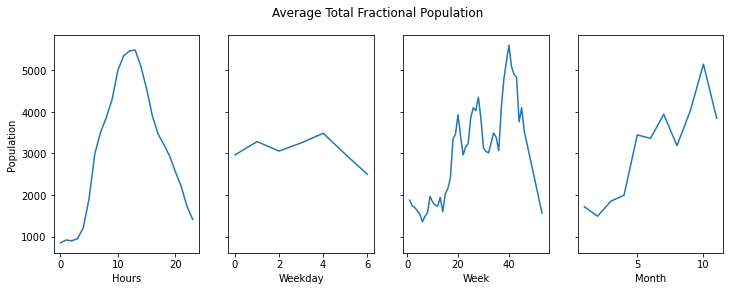

In [635]:
fig, (ax1, ax2, ax3, ax4)= plt.subplots(1,4, figsize=(12, 4), sharey=True)

df_zipcode.groupby(df_zipcode["date"].dt.hour)["pop_tot"].mean().plot(kind='line', ax=ax1)
df_zipcode.groupby(df_zipcode["date"].dt.weekday)["pop_tot"].mean().plot(kind='line', ax=ax2)
df_zipcode.groupby(df_zipcode["date"].dt.isocalendar().week)["pop_tot"].mean().plot(kind='line', ax=ax3)
df_zipcode.groupby(df_zipcode["date"].dt.month)["pop_tot"].mean().plot(kind='line', ax=ax4)

ax1.set_xlabel("Hours")
ax2.set_xlabel("Weekday")
ax3.set_xlabel("Week")
ax4.set_xlabel("Month")

ax1.set_ylabel('Population')

fig.suptitle("Average Total Fractional Population")
plt.show()

In [636]:
df_zipcode['date_split'] = pd.to_datetime(df_zipcode['date']).dt.date
df_zipcode['time_split_hours'] = pd.to_datetime(df_zipcode['date']).dt.time

df_zipcode["date_split"]=pd.to_datetime(df_zipcode["date_split"])
df_zipcode["time_split_hours"]=df_zipcode["time_split_hours"].map(lambda dt: dt.strftime("%H"))

df_zipcode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7728 entries, 0 to 7727
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PC4               7728 non-null   int64         
 1   date              7728 non-null   datetime64[ns]
 2   pop_tot           7728 non-null   int64         
 3   m00_30            7727 non-null   float64       
 4   m30_60            7727 non-null   float64       
 5   H1_2              7727 non-null   float64       
 6   H2_4              7727 non-null   float64       
 7   H4_8              7727 non-null   float64       
 8   H8_16             7727 non-null   float64       
 9   H16plus           7727 non-null   float64       
 10  date_split        7728 non-null   datetime64[ns]
 11  time_split_hours  7728 non-null   object        
dtypes: datetime64[ns](2), float64(7), int64(2), object(1)
memory usage: 784.9+ KB


In [637]:
df_zipcode

,PC4,date,pop_tot,m00_30,m30_60,H1_2,H2_4,H4_8,H8_16,H16plus,date_split,time_split_hours
0,5611,2021-01-01 00:00:00,830,136.0,80.0,34.0,57.0,34.0,34.0,455.0,2021-01-01,00
1,5611,2021-01-01 01:00:00,837,138.0,11.0,23.0,92.0,23.0,80.0,470.0,2021-01-01,01
2,5611,2021-01-01 02:00:00,745,41.0,0.0,0.0,82.0,51.0,71.0,500.0,2021-01-01,02
3,5611,2021-01-01 03:00:00,876,115.0,0.0,0.0,52.0,21.0,125.0,563.0,2021-01-01,03
4,5611,2021-01-01 04:00:00,714,49.0,0.0,0.0,37.0,25.0,111.0,492.0,2021-01-01,04
...,...,...,...,...,...,...,...,...,...,...,...,...
7723,5611,2021-11-18 19:00:00,3265,326.0,58.0,105.0,548.0,501.0,571.0,1156.0,2021-11-18,19
7724,5611,2021-11-18 20:00:00,2829,132.0,72.0,72.0,385.0,409.0,494.0,1265.0,2021-11-18,20
7725,5611,2021-11-18 21:00:00,2352,235.0,13.0,65.0,183.0,209.0,327.0,1320.0,2021-11-18,21
7726,5611,2021-11-18 22:00:00,1792,52.0,10.0,52.0,42.0,198.0,260.0,1178.0,2021-11-18,22


In [638]:
day = "2021-11-08"

df_daily = df_zipcode[(df_zipcode['date_split'] == day)] #.reset_index()
df_daily

,PC4,date,pop_tot,m00_30,m30_60,H1_2,H2_4,H4_8,H8_16,H16plus,date_split,time_split_hours
7464,5611,2021-11-08 00:00:00,814,26.0,0.0,0.0,0.0,53.0,44.0,691.0,2021-11-08,00
7465,5611,2021-11-08 01:00:00,907,10.0,0.0,0.0,0.0,60.0,40.0,797.0,2021-11-08,01
7466,5611,2021-11-08 02:00:00,947,9.0,0.0,0.0,0.0,70.0,43.0,825.0,2021-11-08,02
7467,5611,2021-11-08 03:00:00,995,0.0,0.0,20.0,0.0,59.0,78.0,838.0,2021-11-08,03
7468,5611,2021-11-08 04:00:00,1271,37.0,0.0,25.0,12.0,86.0,74.0,1037.0,2021-11-08,04
7469,5611,2021-11-08 05:00:00,2022,95.0,0.0,0.0,63.0,284.0,332.0,1248.0,2021-11-08,05
7470,5611,2021-11-08 06:00:00,3809,385.0,86.0,29.0,114.0,984.0,1084.0,1127.0,2021-11-08,06
7471,5611,2021-11-08 07:00:00,5586,840.0,56.0,34.0,537.0,1657.0,1702.0,760.0,2021-11-08,07
7472,5611,2021-11-08 08:00:00,5078,586.0,75.0,192.0,468.0,1927.0,1278.0,552.0,2021-11-08,08
7473,5611,2021-11-08 09:00:00,5111,629.0,112.0,292.0,629.0,1617.0,1348.0,484.0,2021-11-08,09


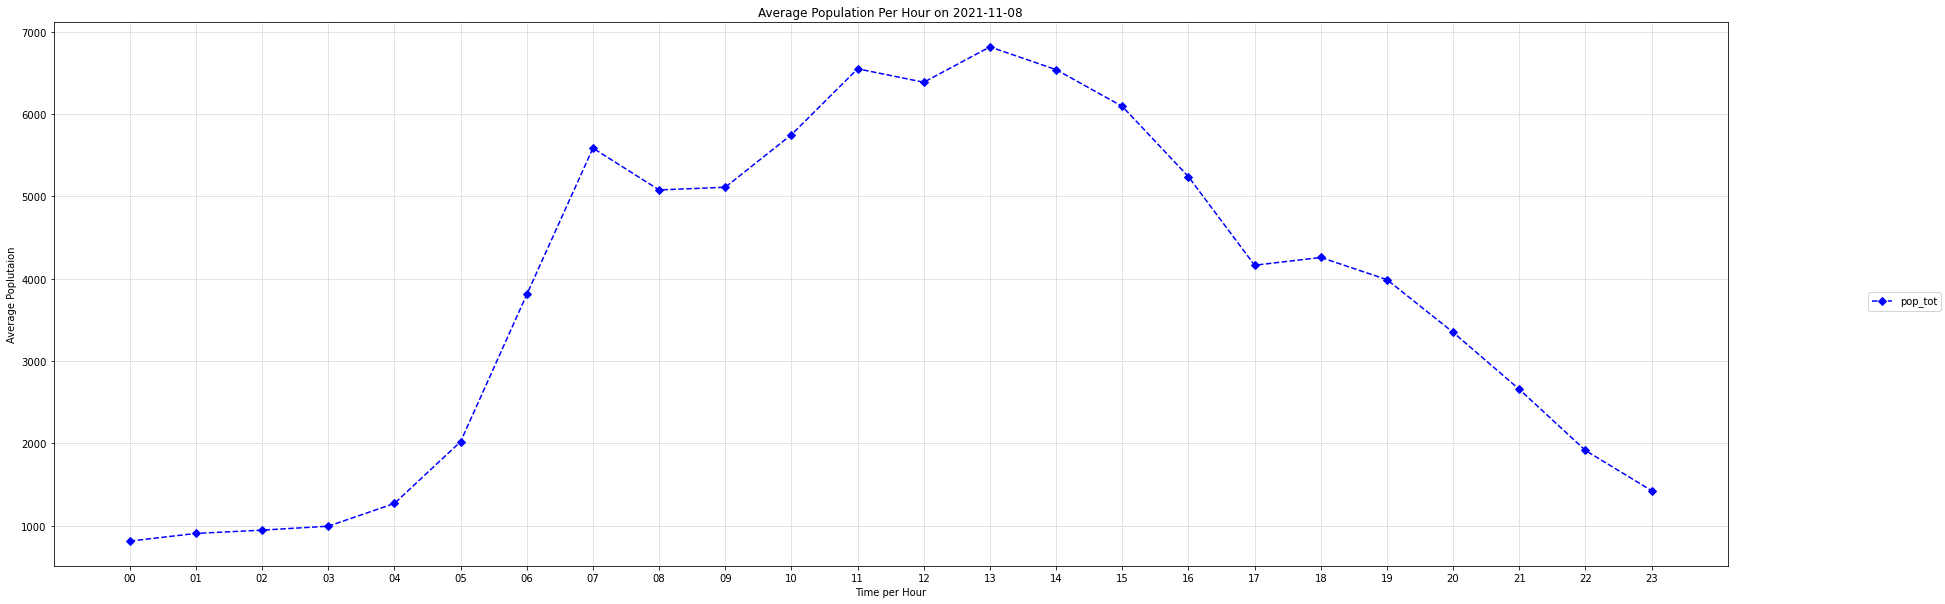

In [639]:
x1 = df_daily['time_split_hours'].values
y1 = df_daily['pop_tot'].values
# y2 = df_daily['m00_30'].values
# y3 = df_daily['m30_60'].values
# y4 = df_daily['H1_2'].values
# y5 = df_daily['H2_4'].values
# y6 = df_daily['H4_8'].values
# y7 = df_daily['H8_16'].values
# y8 = df_daily['H16plus'].values


fig, ax = plt.subplots(figsize=(30, 10))
l1 = ax.plot(x1, y1, '--Db', label="pop_tot")
# l2 = ax.plot(x1, y2, '-o', label="m00_30")
# l3 = ax.plot(x1, y3, '-o', label="m30_60")
# l4 = ax.plot(x1, y4, '-o', label="H1_2")
# l5 = ax.plot(x1, y5, '-o', label="H2_4")
# l6 = ax.plot(x1, y6, '-o', label="H4_8")
# l7 = ax.plot(x1, y7, '-o', label="H8_16")
# l8 = ax.plot(x1, y8, '-o', label="H16plus")

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='right')

plt.ylabel('Average Poplutaion')
plt.xlabel('Time per Hour')
plt.title("Average Population Per Hour on " + day)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

In [640]:
from sklearn.linear_model import LinearRegression

In [641]:
df = zichtop_per_zipcode[5611]
df = df.groupby('date').mean()
df['pop_tot_lag_1'] = df['pop_tot'].shift(1)
df['time'] = np.arange(len(df.index))

X = df['time'].to_frame()
y = df['pop_tot']

In [642]:
model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)

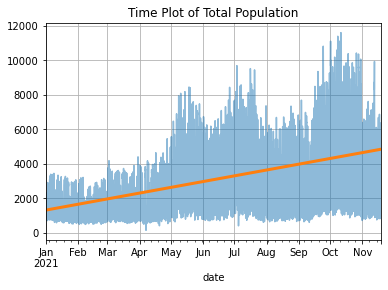

In [643]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Population')
plt.grid()

In [644]:
df = zichtop_per_zipcode[5611]
df = df.groupby('date').mean()
df['pop_tot_lag_1'] = df['pop_tot'].shift(1)
df['time'] = np.arange(len(df.index))

X = df['pop_tot_lag_1'].to_frame()
X = X.bfill()
y = df['pop_tot']
y, X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

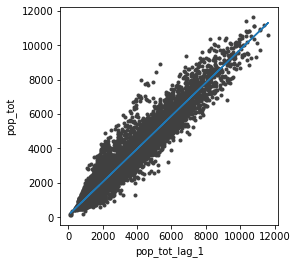

In [645]:
fig, ax = plt.subplots()
ax.plot(X['pop_tot_lag_1'], y, '.', color='0.25')
ax.plot(X['pop_tot_lag_1'], y_pred)
ax.set(aspect='equal', ylabel='pop_tot', xlabel='pop_tot_lag_1');